## Importing dependancies

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and preprocessing

In [3]:
#loading data into pandas data frame

gold=pd.read_csv(r"C:\Users\DELL\Documents\Snehal DS\Snehal Projects\Gold Price Prediction\gld_price_data.csv")

In [4]:
gold.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold.shape

(2290, 6)

In [8]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#Statistical measures of data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
#find correlation values of gold
correlation=gold.corr()

<AxesSubplot:>

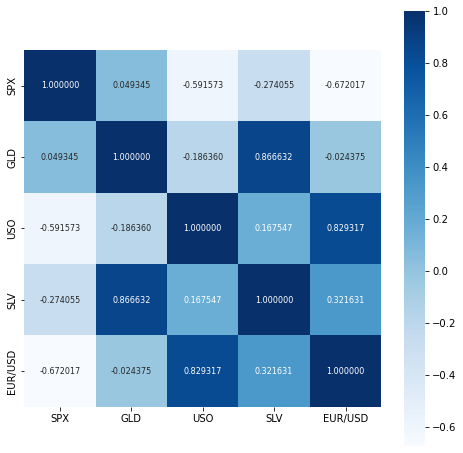

In [20]:
#heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True, fmt='1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [21]:
#Correaltion values of gold
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

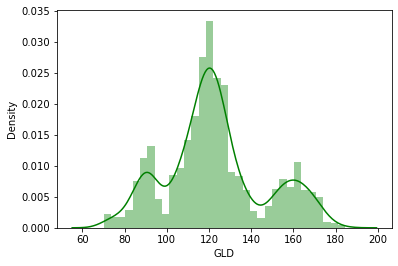

In [22]:
#Check distribution of gold price
sns.distplot(gold['GLD'],color='green')

In [39]:
#splitting features and targets
x=gold.drop(['GLD','Date'],axis=1)
y=gold['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [41]:
#spliting data into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [42]:
#model training
regressor=RandomForestRegressor(n_estimators=100)

In [43]:
#training model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
#Model Evaluation
test_data_pred=regressor.predict(x_test)
print(test_data_pred)

[168.50789937  82.03939996 116.32730053 127.46960086 120.31770139
 154.85269744 150.32789868 125.97480067 117.41929874 125.94640048
 116.54740125 172.05390122 141.53599785 167.95049861 115.1247002
 117.5651005  138.52210267 170.12990118 159.09170168 160.81369986
 155.15760021 124.7872     176.27499935 157.61310275 125.1908002
  94.16509953  78.24779997 120.48010003 119.11209933 167.39739977
  88.32740055 125.44860037  91.12340088 117.66080029 121.13339885
 136.15390082 115.3396012  115.04430098 146.85939989 107.06950073
 104.5936022   87.20209811 126.43910076 117.98810009 151.31209902
 119.57170033 108.49349998 108.11559763  93.13680048 127.24789748
  74.87420053 113.77239939 121.35509999 111.33349914 118.82259899
 120.41479943 159.8854992  168.07060194 147.00519683  85.91659844
  94.42740029  87.03599919  90.63360031 118.98990086 126.47350074
 127.62210014 170.28330025 122.31409919 117.39509877  98.25620005
 168.16660013 142.83339851 131.7290024  121.00780212 120.69059934
 119.5579004

In [46]:
#R Squared error
error_score=metrics.r2_score(y_test,test_data_pred)
print("R Squared error:",error_score)

R Squared error: 0.9895262649922335


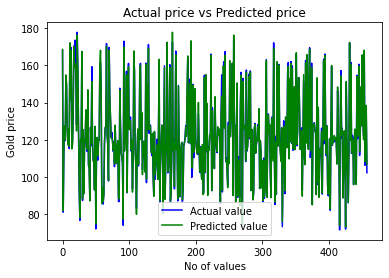

In [51]:
#compare the actual values and predicted values in a lot
y_test=list(y_test)
plt.plot(y_test, color="blue", label="Actual value")
plt.plot(test_data_pred, color="green", label="Predicted value")
plt.title("Actual price vs Predicted price")
plt.xlabel("No of values")
plt.ylabel("Gold price")
plt.legend()
plt.show()